<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


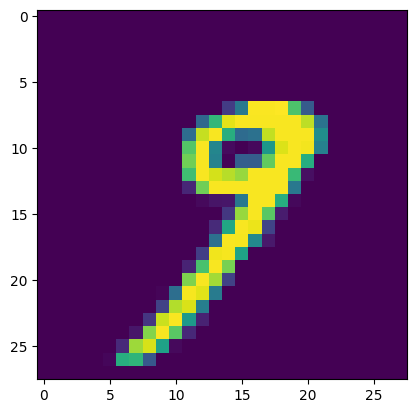

In [4]:
plt.imshow(X_train[33])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

# Generator and Discriminator

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [10]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [11]:
codings_size = 100
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [12]:
GAN = Sequential([generator,discriminator])

In [13]:
discriminator.trainable = False

In [14]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
batch_size = 32

In [16]:
my_data = only_zeros

In [17]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [18]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [19]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [20]:
epochs = 1

In [21]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on epoch {epoch+1}")
  i = 0

  for X_batch in dataset:
    i = i + 1
    if i % 100 == 0:
      print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")

    # Discriminator training phase
    noise = tf.random.normal(shape=[batch_size,codings_size])
    gen_images = generator(noise)
    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real,y1)

    # Train generator
    noise = tf.random.normal(shape=[batch_size,codings_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise,y2)

Currently on epoch 1
	 Currently on batch number 100 of 185


In [22]:
noise = tf.random.normal(shape=[10,codings_size])

In [23]:
noise.shape

TensorShape([10, 100])

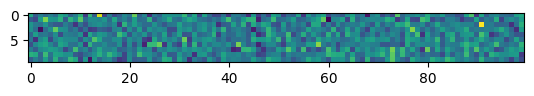

In [24]:
plt.imshow(noise)

In [25]:
images = generator(noise)

In [26]:
images.shape

TensorShape([10, 28, 28])

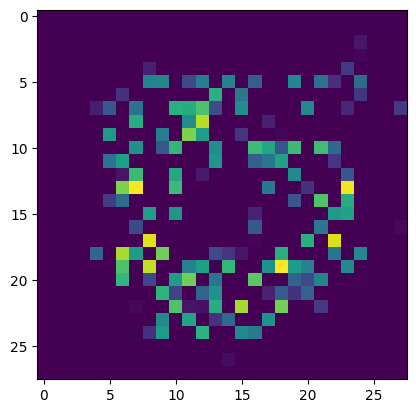

In [27]:
plt.imshow(images[0])

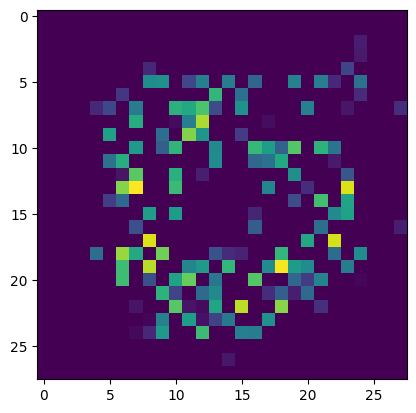

In [28]:
plt.imshow(images[1])